# 45 Opening ERSI ASC Grids and ZMAP Grids 

GemGIS is now capable of also reading ArcGIS ASC files and ZMAP Grids. The data examples shown below were obtained from https://www.nlog.nl/en/scan-2d-seismic-interpretation-and-depth-conversion-dinantian. 

<img src="../images/tutorial45_cover.png">

ESRI Grids Reference: https://desktop.arcgis.com/en/arcmap/10.3/manage-data/raster-and-images/esri-grid-format.htm


## Set File Paths

If you downloaded the latest `GemGIS` from the Github repository, append the path so that the package can be imported successfully. In addition, the file path to the files within the `gemgis_data` folder is set. You can download the data [here](https://github.com/cgre-aachen/gemgis_data/archive/master.zip) if you have not done so.

In [1]:
import sys
sys.path.append('../../../../gemgis')
file_path ='../../../../gemgis_data/data/45_opening_asc_and_zmap_grids/'

## Loading the ASC Grid

When loading the ASC Grid, it will be returned as dict containing the array data, the extent, resolution and nodata_val. A CRS is not provided for the grid. The retrieved data can now be used and saved as tif using ``save_as_tif(..)`` or it can be visualized in PyVista as shown below.

In [2]:
import gemgis as gg

data = gg.raster.read_asc(path= file_path + 'top_dinant_final_tvd.asc')
data

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


{'Data': array([[-99999., -99999., -99999., ..., -99999., -99999., -99999.],
        [-99999., -99999., -99999., ..., -99999., -99999., -99999.],
        [-99999., -99999., -99999., ..., -99999., -99999., -99999.],
        ...,
        [-99999., -99999., -99999., ..., -99999., -99999., -99999.],
        [-99999., -99999., -99999., ..., -99999., -99999., -99999.],
        [-99999., -99999., -99999., ..., -99999., -99999., -99999.]]),
 'Extent': [-42250, 279000, 306000, 867000],
 'Resolution': 250,
 'Nodata_val': -99999}

In [3]:
data['Data']

array([[-99999., -99999., -99999., ..., -99999., -99999., -99999.],
       [-99999., -99999., -99999., ..., -99999., -99999., -99999.],
       [-99999., -99999., -99999., ..., -99999., -99999., -99999.],
       ...,
       [-99999., -99999., -99999., ..., -99999., -99999., -99999.],
       [-99999., -99999., -99999., ..., -99999., -99999., -99999.],
       [-99999., -99999., -99999., ..., -99999., -99999., -99999.]])

The extent is defined as xmin, xmax, ymin, ymax.

In [4]:
data['Extent']

[-42250, 279000, 306000, 867000]

In [5]:
data['Resolution']

250

In [6]:
data['Nodata_val']

-99999

### Visualization in PyVista

The data can be visualized using a Structured Grid. Therefore, the function ``create_structured_grid_from_asc(...)`` can be used.


In [7]:
grid = gg.visualization.create_structured_grid_from_asc(data=data)
grid

StructuredGrid (0x1defba8c6a0)
  N Cells:	2880012
  N Points:	2883540
  X Bounds:	-4.225e+04, 2.788e+05
  Y Bounds:	3.060e+05, 8.668e+05
  Z Bounds:	-1.000e+05, 2.880e+02
  Dimensions:	2244, 1285, 1
  N Arrays:	1

In [8]:
grid.save(file_path + 'top_dinant_final_tvd.vtk')

### Creating Contour Lines

In [9]:
import pyvista as pv 
contours = pv.read(file_path+'top_dinant_final_tvd_contours.vtk')

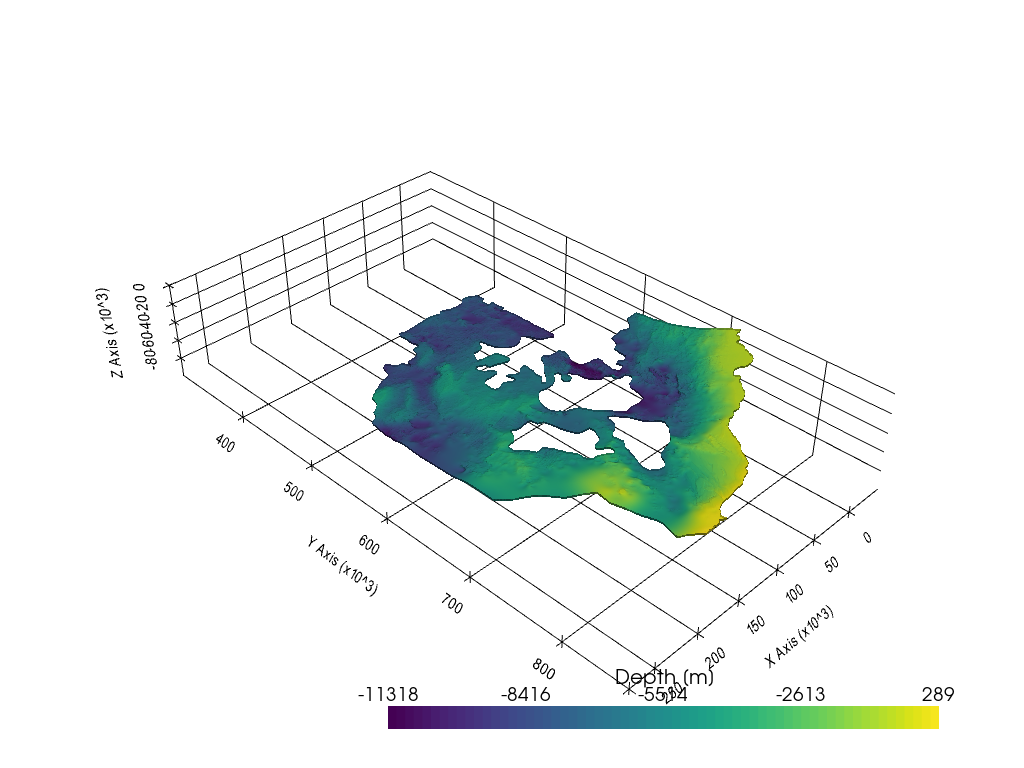

In [10]:
sargs = dict(fmt="%.0f", color='black')

p = pv.Plotter(notebook=True)

p.add_mesh(grid, scalars='Depth [m]', nan_opacity=0, scalar_bar_args=sargs)

p.show_grid(color='black')
p.set_background(color='white')
p.show()

## Loading the ZMAP Grid

The same dataset as before is also provided as ZMAP Grid. 

In [11]:
data = gg.raster.read_zmap(file_path + 'top_dinant_final_tvd.dat')
data

{'Data': array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 'Extent': [-42250.0, 278750.0, 306000.0, 866750.0],
 'Resolution': [250.0, 250.0],
 'Nodata_val': 1e+30,
 'Dimensions': (2244, 1285),
 'CRS': 'Amersfoort * EPSG-Nld / RD New [28992,1672]',
 'Creation_date': '21/10/2019',
 'Creation_time': '16',
 'File_name': 'TOP_DINANTIAN_TVD_final'}

In [12]:
grid = gg.visualization.create_structured_grid_from_zmap(data=data)
grid

StructuredGrid (0x1deff3712e0)
  N Cells:	2880012
  N Points:	2883540
  X Bounds:	-4.225e+04, 2.788e+05
  Y Bounds:	3.060e+05, 8.668e+05
  Z Bounds:	-1.132e+04, 2.887e+02
  Dimensions:	2244, 1285, 1
  N Arrays:	1

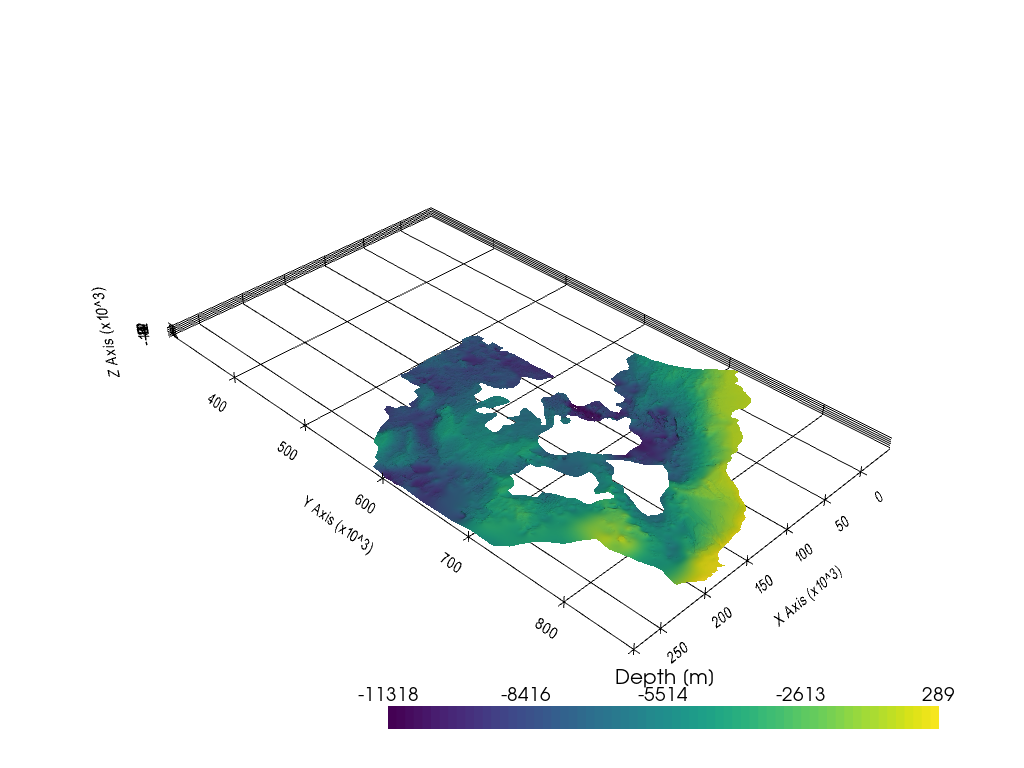

In [13]:
import pyvista as pv 
sargs = dict(fmt="%.0f", color='black')

p = pv.Plotter(notebook=True)

p.add_mesh(grid, scalars='Depth [m]', nan_opacity=0, scalar_bar_args=sargs)

p.show_grid(color='black')
p.set_background(color='white')
p.show()